In [45]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import seaborn as sns
import string

In [46]:
df= pd.read_csv("C:\\Users\\samri\\Desktop\\spam.csv",encoding='latin-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1478,ham,I think its far more than that but find out. C...,NaN,NaN,NaN
2729,spam,Urgent! Please call 09066612661 from your land...,NaN,NaN,NaN
3315,ham,I know girls always safe and selfish know i go...,NaN,NaN,NaN
4343,ham,Hi:)did you asked to waheeda fathima about leave?,NaN,NaN,NaN
916,ham,Was actually about to send you a reminder toda...,NaN,NaN,NaN


In [47]:
df.shape

(5572, 5)

## Data cleaning

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [49]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [50]:
df.sample(5)

,v1,v2
3477,ham,I can ask around but there's not a lot in term...
2516,ham,Yes.i'm in office da:)
3270,spam,You have 1 new voicemail. Please call 08719181...
3994,ham,R u in this continent?
2476,ham,i dnt wnt to tlk wid u


In [51]:
df.rename(columns={"v1":"Target","v2":"Text"},inplace=True)
df.sample(5)

,Target,Text
4516,ham,"Men always needs a beautiful, intelligent, car..."
5507,ham,I want to be inside you every night...
2465,ham,S.i think he is waste for rr..
508,ham,What's the significance?
5510,ham,I went to project centre


In [52]:
encoder=LabelEncoder()

In [53]:
df["Target"]=encoder.fit_transform(df["Target"])

In [54]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [55]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [56]:
df.duplicated().sum()

403

In [57]:
df=df.drop_duplicates(keep="first")

In [58]:
df.duplicated().sum()

0

In [59]:
df.shape

(5169, 2)

## Exploratory data Analysis

In [60]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [61]:
df["Target"].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

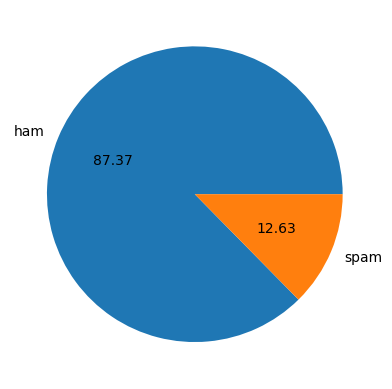

In [62]:
plt.pie(df["Target"].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()

In [63]:
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\samri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [64]:
df["num_characters"]=df["Text"].apply(len)

In [65]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [66]:
df["num_words"]=df["Text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [67]:
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [68]:
df["num_sentences"]=df["Text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [69]:
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [70]:
df[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [71]:
#ham
df[df["Target"]==0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [72]:
#spam
df[df["Target"]==1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

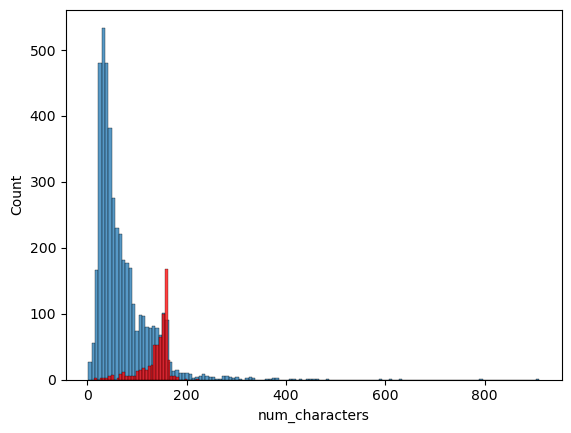

In [73]:
sns.histplot(df[df["Target"]==0]["num_characters"])
sns.histplot(df[df["Target"]==1]["num_characters"],color="red")

<Axes: xlabel='num_words', ylabel='Count'>

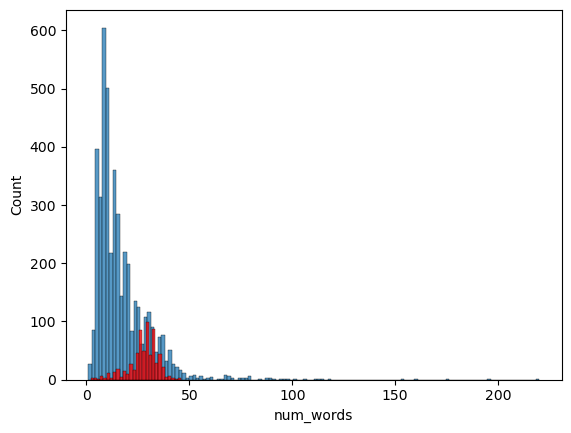

In [74]:
sns.histplot(df[df["Target"]==0]["num_words"])
sns.histplot(df[df["Target"]==1]["num_words"],color="red")

<Axes: xlabel='num_sentences', ylabel='Count'>

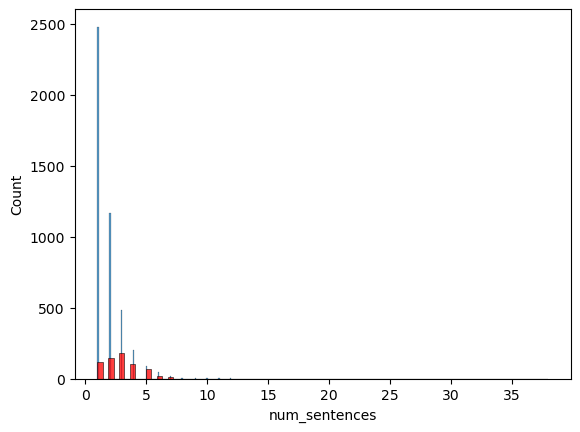

In [75]:
sns.histplot(df[df["Target"]==0]["num_sentences"])
sns.histplot(df[df["Target"]==1]["num_sentences"],color="red")

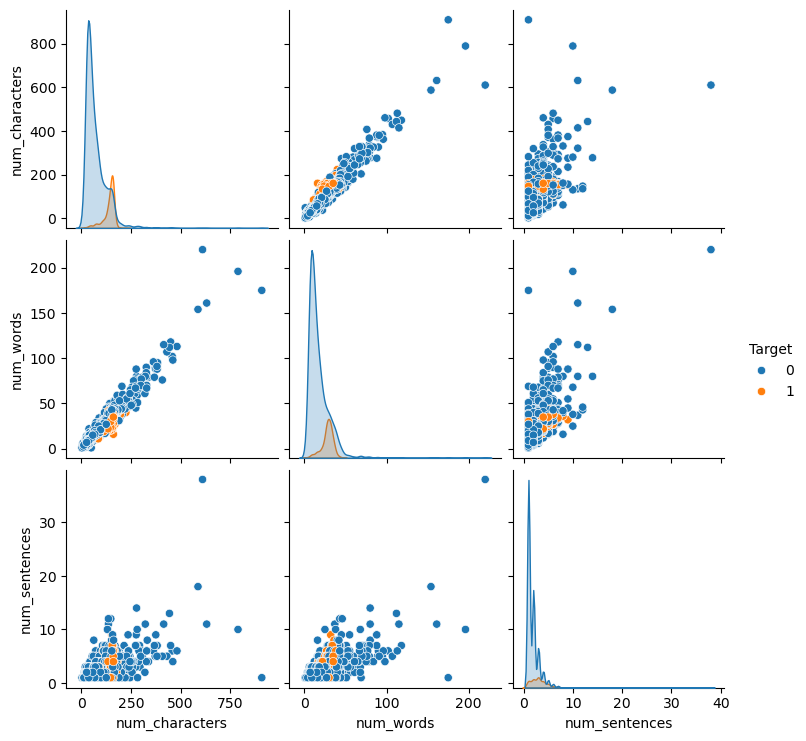

In [76]:
sns.pairplot(df,hue="Target")

In [77]:
df.corr(numeric_only=True)

,Target,num_characters,num_words,num_sentences
Target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


In [78]:
corr = df.corr(numeric_only=True)

<Axes: >

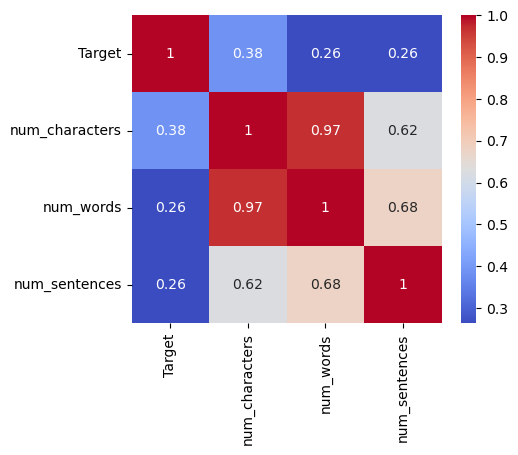

In [79]:
fig, ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap="coolwarm")

## Data Preprocessing

In [84]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [82]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [83]:
transform_text("I am doing this Machine Learning project")

'machin learn project'

In [85]:
df["transform_text"]=df["Text"].apply(transform_text)
df.head()

,Target,Text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [91]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [98]:
spam_wc=wc.generate(df[df["Target"]==1]["transform_text"].str.cat(sep=" "))

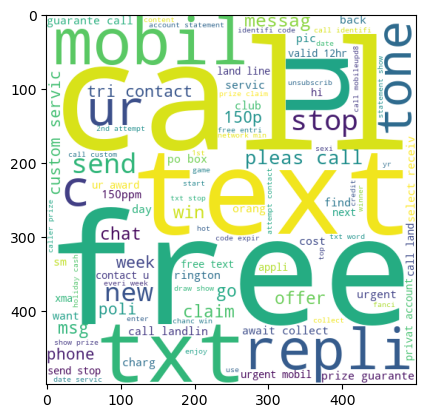

In [99]:
plt.imshow(spam_wc)

In [104]:
ham_wc=wc.generate(df[df["Target"]==0]["c"].str.cat(sep=" "))

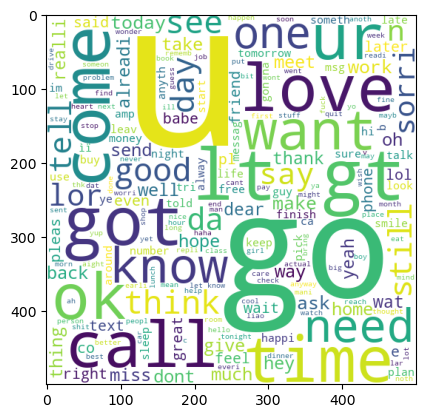

In [105]:
plt.imshow(ham_wc)

In [106]:
spam_corpus=[]
for msg in df[df["Target"]==1]["transform_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [107]:
len(spam_corpus)

9939

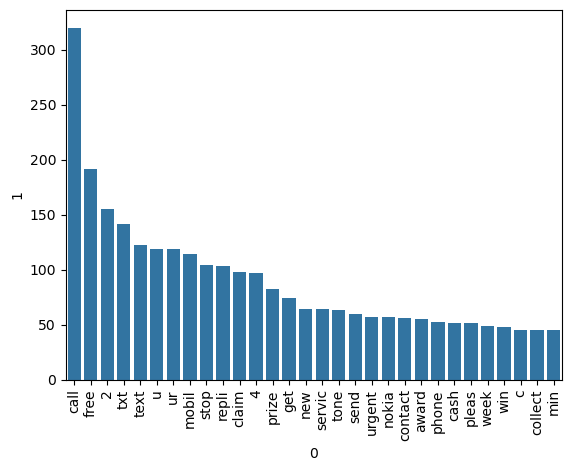

In [112]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

In [113]:
ham_corpus=[]
for msg in df[df["Target"]==0]["transform_text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [114]:
len(ham_corpus)

35404

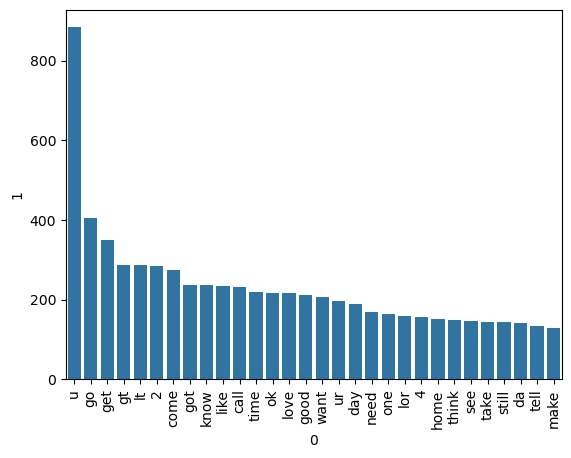

In [115]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

## Model Building

In [137]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [138]:
X=tfidf.fit_transform(df["transform_text"]).toarray()

In [139]:
X.shape

(5169, 3000)

In [140]:
y=df["Target"].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [143]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [144]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [145]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [146]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [147]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187
